# SMOTE 

In [13]:
# Using SMOTE (Synthetic Minority Over-sampling Technique) from the imbalanced-learn library to handle class imbalance.

In [24]:
import numpy as np
from collections import Counter

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt



In [25]:
df = pd.read_csv("../data/imbalanced_preprocessed_1.csv")


In [26]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

In [27]:




# Separate features and target variable
X = df[['dynamics_rms_mean', 'dynamics_rms_std',
       'pitch_pitch_mean', 'rhythm_attacktime_mean',
       'rhythm_eventdensity_mean', 'rhythm_fluctuationmax_peakposmean',
       'rhythm_pulseclarity_mean', 'rhythm_tempo_mean', 'rhythm_tempo_std',
       'spectral_brightness_mean', 'spectral_brightness_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_flatness_mean', 'spectral_flatness_std',
       'spectral_inharmonicity_mean', 'spectral_irregularity_mean',
       'spectral_kurtosis_mean', 'spectral_kurtosis_std',
       'spectral_mfcc_mean_1', 'spectral_mfcc_mean_10',
       'spectral_mfcc_mean_11', 'spectral_mfcc_mean_12',
       'spectral_mfcc_mean_13', 'spectral_mfcc_mean_2', 'spectral_mfcc_mean_3',
       'spectral_mfcc_mean_4', 'spectral_mfcc_mean_5', 'spectral_mfcc_mean_6',
       'spectral_mfcc_mean_7', 'spectral_mfcc_mean_8', 'spectral_mfcc_mean_9',
       'spectral_mfcc_std_1', 'spectral_mfcc_std_10', 'spectral_mfcc_std_11',
       'spectral_mfcc_std_12', 'spectral_mfcc_std_13', 'spectral_mfcc_std_2',
       'spectral_mfcc_std_3', 'spectral_mfcc_std_4', 'spectral_mfcc_std_5',
       'spectral_mfcc_std_6', 'spectral_mfcc_std_7', 'spectral_mfcc_std_8',
       'spectral_mfcc_std_9', 'spectral_novelty_mean', 'spectral_novelty_std',
       'spectral_rolloff85_mean', 'spectral_rolloff85_std',
       'spectral_rolloff95_mean', 'spectral_rolloff95_std',
       'spectral_roughness_mean', 'spectral_skewness_mean',
       'spectral_skewness_std', 'spectral_spectentropy_mean',
       'spectral_spectentropy_std', 'spectral_spread_mean',
       'spectral_spread_std', 'timbre_lowenergy_mean', 'timbre_lowenergy_std',
       'timbre_spectralflux_mean', 'timbre_spectralflux_std',
       'tonal_hcdf_mean', 'tonal_hcdf_std', 'tonal_keyclarity_mean',
       'tonal_keyclarity_std', 'tonal_mode_mean', 'tonal_mode_std']]  # Feature columns
y = df['Category_encoded']       # Encoded target column



In [28]:
# Apply SMOTE to oversample minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [29]:
# Decode target variable back to original labels
y_resampled = label_encoder.inverse_transform(y_resampled)



In [30]:
# Create a balanced DataFrame
df_balanced = pd.DataFrame(X_resampled)
df_balanced['Category'] = y_resampled

# Display class distribution after oversampling
print(df_balanced['Category'].value_counts())

Category
Class 4    182
Class 1    182
Class 3    182
Class 2    182
Name: count, dtype: int64


In [31]:
print(df['Category'].value_counts())


Category
Class 4    182
Class 2    173
Class 3     83
Class 1     42
Name: count, dtype: int64


In [33]:
df_balanced

,dynamics_rms_mean,dynamics_rms_std,pitch_pitch_mean,rhythm_attacktime_mean,rhythm_eventdensity_mean,rhythm_fluctuationmax_peakposmean,rhythm_pulseclarity_mean,rhythm_tempo_mean,rhythm_tempo_std,spectral_brightness_mean,...,timbre_lowenergy_std,timbre_spectralflux_mean,timbre_spectralflux_std,tonal_hcdf_mean,tonal_hcdf_std,tonal_keyclarity_mean,tonal_keyclarity_std,tonal_mode_mean,tonal_mode_std,Category
0,0.013444,0.005903,375.990904,0.016346,1.145663,2.833503,0.136728,105.799224,37.620073,0.314003,...,1.558017,10.204444,5.785453,0.244838,0.321193,0.457834,0.171750,-0.043605,0.068892,Class 4
1,0.011291,0.008784,855.112001,0.016366,2.127660,2.382534,0.156985,103.708910,20.224905,0.354676,...,0.537740,9.799859,8.441237,0.629594,0.341241,0.440244,0.132387,-0.023940,0.098591,Class 4
2,0.052846,0.028216,739.893910,0.020400,3.600655,3.233480,0.471585,162.728967,3.858627,0.249045,...,1.429992,45.529733,29.307053,0.337036,0.215957,0.465368,0.129338,-0.031692,0.096302,Class 1
3,0.087529,0.020352,630.302807,0.015339,3.764321,2.374726,0.114023,134.892943,47.667156,0.304335,...,1.028468,67.812560,16.124870,0.195859,0.101366,0.576344,0.150061,-0.086635,0.111011,Class 1
4,0.004937,0.002017,403.411721,0.022044,0.818331,2.660629,0.177054,135.581084,49.922858,0.381046,...,1.751029,3.351369,1.879515,0.197610,0.262656,0.501407,0.136241,-0.060317,0.062196,Class 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.057648,0.013728,225.380668,0.015485,6.959857,2.924160,0.244289,141.949571,29.493794,0.046701,...,1.375147,51.880117,19.201521,0.259795,0.095187,0.449261,0.134743,-0.017202,0.101114,Class 3
724,0.005375,0.001100,589.903944,0.022367,4.660751,3.130096,0.323173,105.399739,12.870276,0.518148,...,1.585106,3.869056,1.336283,0.220979,0.157334,0.415155,0.109037,-0.037112,0.063484,Class 3
725,0.039108,0.013039,318.863145,0.013226,3.478284,3.174252,0.170579,123.800059,29.205314,0.155171,...,0.802599,31.185593,13.092445,0.264782,0.160829,0.434205,0.130783,-0.001012,0.091898,Class 3
726,0.030560,0.014167,558.120874,0.021430,3.350373,2.712844,0.162906,99.973184,5.762907,0.080963,...,1.422783,21.878036,11.442721,0.249489,0.205447,0.400600,0.145950,-0.035465,0.075057,Class 3


In [34]:
df_balanced.to_csv("../data/balanced_preprocessed_1.csv" , index = False)

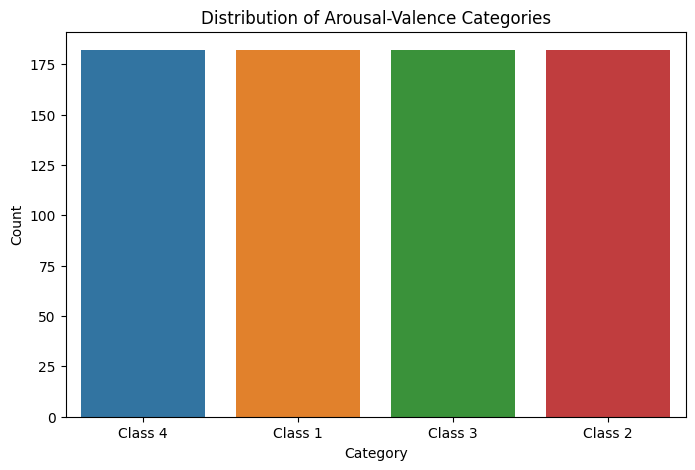

In [35]:


# Count the occurrences of each category
category_counts = df_balanced['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values , hue= category_counts.index)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Arousal-Valence Categories')

# Show the plot
plt.show()